In [28]:
import pickle

# Load the augmented images and labels from the file
with open('data_useable.pickle', 'rb') as f:
    augmented_images, augmented_labels = pickle.load(f)

In [29]:
import numpy as np

augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

augmented_images.shape

(2000, 512, 512, 3)

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout

# Define the CNN model
# architecture: conv layer maxpooling batchnorm -> conv layer maxpooling batchnorm -> conv layer maxpooling batchnorm -> fully connected layer -> output layer
# output layer is a single neuron with sigmoid activation function
# output should be a probability between 0 and 1

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(512, 512, 3)),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(512, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(512, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='sigmoid')
])

c:\Users\juliu\Documents\dscs\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_38 (Conv2D)              │ (None, 510, 510, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 255, 255, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_38          │ (None, 255, 255, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 253, 253, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 126, 126, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_39          │ (None, 126, 126, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 124, 124, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 62, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_40          │ (None, 62, 62, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 60, 60, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 30, 30, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_41          │ (None, 30, 30, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_42          │ (None, 14, 14, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_43 (MaxPooling2D) │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_43          │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 2)              │         1,02

 Total params: 13,373,122 (51.01 MB)

 Trainable params: 13,370,114 (51.00 MB)

 Non-trainable params: 3,008 (11.75 KB)

In [32]:
history = model.fit(
  augmented_images,
  augmented_labels,
  validation_split=0.2,
  epochs=10,
  batch_size=32
  )

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 179s 4s/step - accuracy: 0.5246 - loss: 35.7766 - val_accuracy: 0.5050 - val_loss: 1336.2183
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 178s 4s/step - accuracy: 0.6985 - loss: 10.9922 - val_accuracy: 0.5550 - val_loss: 59.0242
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 175s 4s/step - accuracy: 0.7312 - loss: 2.0944 - val_accuracy: 0.5075 - val_loss: 11.4218
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 179s 4s/step - accuracy: 0.8226 - loss: 0.5284 - val_accuracy: 0.5700 - val_loss: 6.0458
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 175s 4s/step - accuracy: 0.8563 - loss: 0.3542 - val_accuracy: 0.6950 - val_loss: 1.4802
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 177s 4s/step - accuracy: 0.8567 - loss: 0.3918 - val_accuracy: 0.5800 - val_loss: 2.9605
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 171s 3s/step - accuracy: 0.8543 - loss: 0.3624 - val_accuracy: 0.8075 - val_loss: 0.8517
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 168s 3s/step - accuracy: 0.8821 - loss: 0.2858 - val_accuracy: 0.8

In [33]:
model.save('model_green_3.h5')

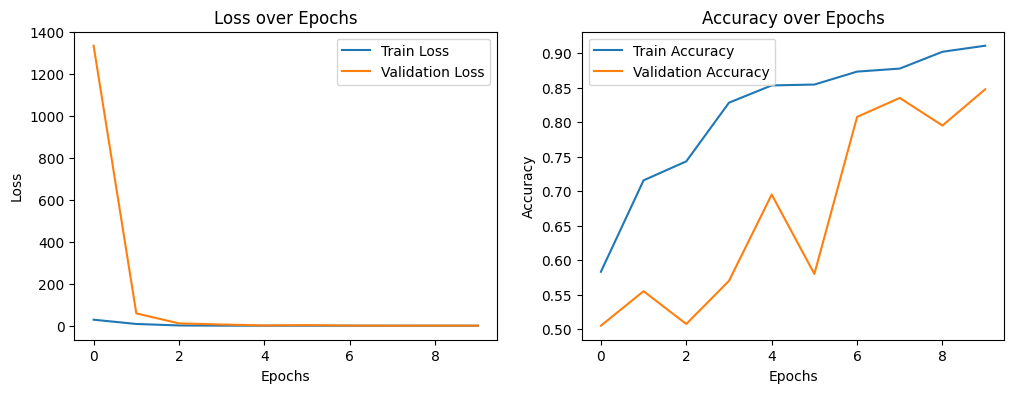

In [34]:
# Optionally, plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.show()